In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from ase.lattice.cubic import FaceCenteredCubic
from ase.md.langevin import Langevin
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.io.trajectory import Trajectory
from ase import units
from ase.calculators.emt import EMT

size = 3
a = 4.24068463425528
T = 1023  # Kelvin
T *= units.kB
atoms = FaceCenteredCubic(directions=[[1, 0, 0], [0, 1, 0], [0, 0, 1]],
                          latticeconstant=a,
                          symbol="Al",
                          size=(size, size, size),
                          pbc=True)

calc = EMT()
atoms.set_calculator(calc)

MaxwellBoltzmannDistribution(atoms, T, force_temp=True)

dyn = Langevin(atoms, 2 * units.fs, T, 0.1)

# Data storage
steps = []
epot_list = []
ekin_list = []
total_energy_list = []
temperature_list = []

step = 0
interval = 1

def printenergy(a=atoms):  
    global step, interval
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    temp = ekin / (1.5 * units.kB)
    
    steps.append(step)
    epot_list.append(epot)
    ekin_list.append(ekin)
    total_energy_list.append(epot + ekin)
    temperature_list.append(temp)
    
    print('Step={:<8d} Epot={:.5f} Ekin={:.5f} T={:.3f} Etot={:.5f}'.format(
        step, epot, ekin, temp, epot + ekin))
    
    step += interval
    
dyn.attach(printenergy, interval=1)

traj = Trajectory('md.traj', 'w', atoms)
dyn.attach(traj.write, interval=5)

dyn.run(1000)


/var/folders/dx/b9tk_hhd1x1dxjmtzwfq_p6w0000gn/T/ipykernel_564/3882619841.py:22: FutureWarning: Please use atoms.calc = calc
  atoms.set_calculator(calc)
/Users/francescapagano/miniconda3/envs/myenv_mlmd/lib/python3.9/site-packages/ase/md/md.py:52: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))


Step=0        Epot=0.05617 Ekin=0.13223 T=1023.000 Etot=0.18840
Step=1        Epot=0.05655 Ekin=0.13031 T=1008.116 Etot=0.18685
Step=2        Epot=0.05768 Ekin=0.12815 T=991.405 Etot=0.18583
Step=3        Epot=0.05958 Ekin=0.12694 T=982.078 Etot=0.18653
Step=4        Epot=0.06224 Ekin=0.12383 T=958.001 Etot=0.18607
Step=5        Epot=0.06556 Ekin=0.12183 T=942.553 Etot=0.18740
Step=6        Epot=0.06956 Ekin=0.12230 T=946.168 Etot=0.19186
Step=7        Epot=0.07409 Ekin=0.11531 T=892.089 Etot=0.18940
Step=8        Epot=0.07902 Ekin=0.11109 T=859.398 Etot=0.19010
Step=9        Epot=0.08429 Ekin=0.10484 T=811.068 Etot=0.18913
Step=10       Epot=0.08978 Ekin=0.10106 T=781.858 Etot=0.19084
Step=11       Epot=0.09541 Ekin=0.09493 T=734.385 Etot=0.19034
Step=12       Epot=0.10122 Ekin=0.09098 T=703.881 Etot=0.19221
Step=13       Epot=0.10707 Ekin=0.08705 T=673.477 Etot=0.19412
Step=14       Epot=0.11289 Ekin=0.08462 T=654.636 Etot=0.19751
Step=15       Epot=0.11866 Ekin=0.08361 T=646.858 Eto

True

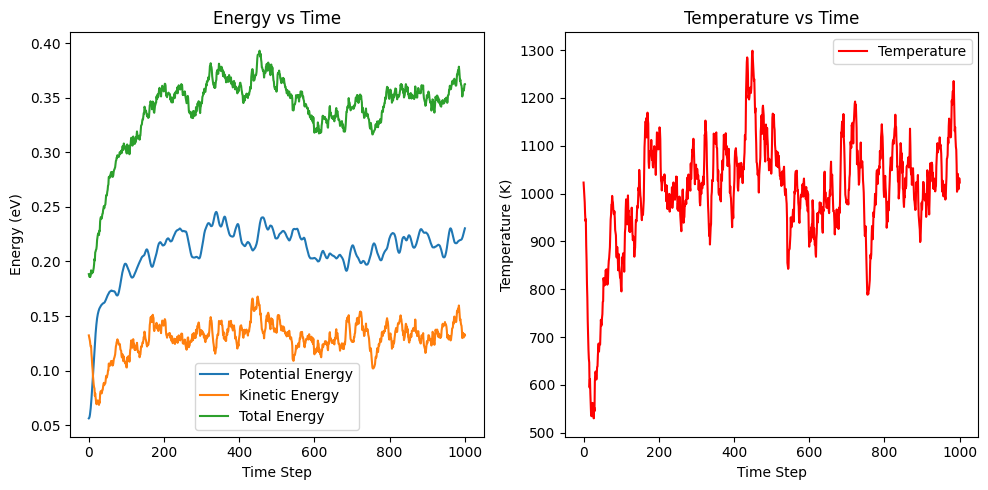

In [3]:

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(steps, epot_list, label='Potential Energy')
plt.plot(steps, ekin_list, label='Kinetic Energy')
plt.plot(steps, total_energy_list, label='Total Energy')
plt.xlabel('Time Step')
plt.ylabel('Energy (eV)')
plt.legend()
plt.title('Energy vs Time')

plt.subplot(1, 2, 2)
plt.plot(steps, temperature_list, label='Temperature', color='r')
plt.xlabel('Time Step')
plt.ylabel('Temperature (K)')
plt.legend()
plt.title('Temperature vs Time')

plt.tight_layout()
plt.show()


In [4]:
from utils import *
draw_system(atoms)

2025-01-30 15:06:24.379 python[610:4400613] +[IMKClient subclass]: chose IMKClient_Legacy
2025-01-30 15:06:24.379 python[610:4400613] +[IMKInputSession subclass]: chose IMKInputSession_Legacy
